## Gradient Boosting Classifier

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE, RandomOverSampler

pd.pandas.set_option('display.max_columns', None)

In [3]:
crash_19 = pd.read_csv('../data/crash_19')

FileNotFoundError: [Errno 2] No such file or directory: '../data/crash_19'

Setting column 'RD_NO' as index.

In [3]:
crash_19.set_index(['RD_NO'], inplace = True)

In [4]:
crash_19.head()

,POSTED_SPEED_LIMIT,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,DEVICE_CONDITION_FUNCTIONING IMPROPERLY,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,LIGHTING_CONDITION_DARKNESS,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAWN,LIGHTING_CONDITION_DAYLIGHT,LIGHTING_CONDITION_DUSK,LIGHTING_CONDITION_UNKNOWN,FIRST_CRASH_TYPE_ANGLE,FIRST_CRASH_TYPE_ANIMAL,FIRST_CRASH_TYPE_FIXED OBJECT,FIRST_CRASH_TYPE_HEAD ON,FIRST_CRASH_TYPE_OTHER NONCOLLISION,FIRST_CRASH_TYPE_OTHER OBJECT,FIRST_CRASH_TYPE_OVERTURNED,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDALCYCLIST,FIRST_CRASH_TYPE_PEDESTRIAN,FIRST_CRASH_TYPE_REAR END,FIRST_CRASH_TYPE_REAR TO FRONT,FIRST_CRASH_TYPE_REAR TO REAR,FIRST_CRASH_TYPE_REAR TO SIDE,FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,FIRST_CRASH_TYPE_TRAIN,FIRST_CRASH_TYPE_TURNING,TRAFFICWAY_TYPE_ALLEY,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED),TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER,TRAFFICWAY_TYPE_DRIVEWAY,"TRAFFICWAY_TYPE_FIVE POINT, OR MORE",TRAFFICWAY_TYPE_FOUR WAY,TRAFFICWAY_TYPE_L-INTERSECTION,TRAFFICWAY_TYPE_NOT DIVIDED,TRAFFICWAY_TYPE_NOT REPORTED,TRAFFICWAY_TYPE_ONE-WAY,TRAFFICWAY_TYPE_OTHER,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_ROUNDABOUT,TRAFFICWAY_TYPE_T-INTERSECTION,TRAFFICWAY_TYPE_TRAFFIC ROUTE,TRAFFICWAY_TYPE_UNKNOWN,TRAFFICWAY_TYPE_UNKNOWN INTERSECTION TYPE,TRAFFICWAY_TYPE_Y-INTERSECTION,ALIGNMENT_CURVE ON GRADE,ALIGNMENT_CURVE ON HILLCREST,"ALIGNMENT_CURVE, LEVEL",ALIGNMENT_STRAIGHT AND LEVEL,ALIGNMENT_STRAIGHT ON GRADE,ALIGNMENT_STRAIGHT ON HILLCREST,ROADWAY_SURFACE_COND_DRY,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_DEBRIS ON ROADWAY,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,PRIM_CONTRIBUTORY_CAUSE_ANIMAL,PRIM_CONTRIBUTORY_CAUSE_BICYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_CELL PHONE USE OTHER THAN TEXTING,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING OTHER TRAFFIC SIGNS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING ROAD MARKINGS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING STOP SIGN,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING YIELD SIGN,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM INSIDE VEHICLE,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM OUTSIDE VEHICLE,"PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",PRIM_CONTRIBUTORY_CAUSE_DRIVING ON WRONG SIDE/WRONG WAY,PRIM_CONTRIBUTORY_CAUSE_DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,PRIM_CONTRIBUTORY_CAUSE_EQUIPMENT - VEHICLE CONDITION,"PRIM_CONTRIBUTORY_CAUSE_EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",PRIM_CONTRIBUTORY_CAUSE_EXCEEDING AUTHORIZED SPEED LIMIT,PRIM_CONTRIBUTORY_CAUSE_EXCEEDING SAFE SPEED FOR CONDITIONS,PRIM_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH,PRIM_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY,PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY,PRIM_CONTRIBUTORY_CAUSE_HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),PRIM_CONTRIBUTORY_CAUSE_IMPROPER BACKING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER LANE USAGE,PRIM_CONTRIBUTORY_CAUSE_IMPROPER OVERTAKING/PASSING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER TURNING/NO SIGNAL,PRIM_CONTRIBUTORY_CAUSE_MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_NOT APPLICABLE,PRIM_CONTRIBUTORY_CAUSE_OBSTRUCTED CROSSWALKS,"PRIM_CONTRIBUTORY_CAUSE_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",PRIM_CONTRIBUTORY_CAUSE_PASSING STOPPED SCHOOL BUS,PRIM_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER,PRIM_CONTRIBUTOR

In [5]:
crash_19.shape

(117427, 118)

Checking the value counts of our target variable which shows it is very imbalanced.

In [6]:
crash_19['MOST_SEVERE_INJURY'].value_counts(normalize = True)

0    0.90377
1    0.09623
Name: MOST_SEVERE_INJURY, dtype: float64

A function that returns the confusion matrix as well as the precision, recall, and f1 score for each model.

In [7]:
def evaluation(y_actual, predicted):
    cnf_matrix = confusion_matrix(y_actual, predicted)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'viridis', fmt = 'd')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    
    labels = ['No Injury', 'Injury']
    print(classification_report(y_actual, predicted, target_names = labels))

### Preprocessing

In [8]:
X = crash_19.drop(columns = 'MOST_SEVERE_INJURY')
y = crash_19['MOST_SEVERE_INJURY']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Gradient Boost

In [12]:
gboost = GradientBoostingClassifier()

gboost.fit(X_train, y_train)

gboost.score(X_train, y_train), gboost.score(X_test, y_test)

(0.9198932667196548, 0.9181796505092482)

In [13]:
gboost_preds = gboost.predict(X_test)

              precision    recall  f1-score   support

   No Injury       0.93      0.99      0.96     26532
      Injury       0.68      0.29      0.40      2825

    accuracy                           0.92     29357
   macro avg       0.80      0.64      0.68     29357
weighted avg       0.90      0.92      0.90     29357



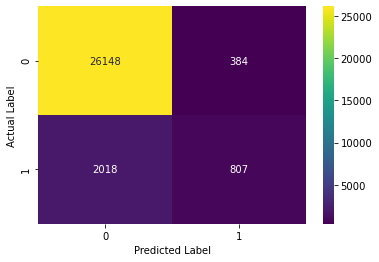

In [14]:
evaluation(y_test, gboost_preds)

### Near Miss

In [15]:
nm = NearMiss()

X_train_under, y_train_under = nm.fit_resample(X_train, y_train)

In [16]:
y_train_under.value_counts()

1    8475
0    8475
Name: MOST_SEVERE_INJURY, dtype: int64

In [18]:
gboost_under = GradientBoostingClassifier()

gboost_under.fit(X_train_under, y_train_under)

gboost_under.score(X_train_under, y_train_under), gboost_under.score(X_test, y_test)

(0.8616519174041298, 0.3757195898763498)

In [19]:
gboost_under_preds = gboost_under.predict(X_test)

              precision    recall  f1-score   support

   No Injury       0.95      0.33      0.49     26532
      Injury       0.12      0.83      0.20      2825

    accuracy                           0.38     29357
   macro avg       0.53      0.58      0.35     29357
weighted avg       0.87      0.38      0.46     29357



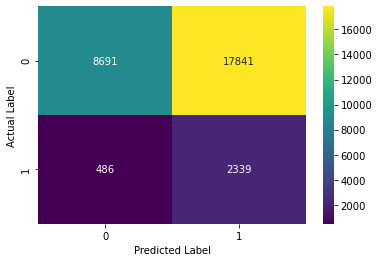

In [20]:
evaluation(y_test, gboost_under_preds)

### Random Over-Sampler

In [21]:
ros = RandomOverSampler()

X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

In [22]:
gboost_over = GradientBoostingClassifier()

gboost_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier()

In [23]:
gboost_over.score(X_train_over, y_train_over), gboost_over.score(X_test, y_test)

(0.7573151579873107, 0.7612494464693259)

In [24]:
gboost_over_preds = gboost_over.predict(X_test)

              precision    recall  f1-score   support

   No Injury       0.96      0.76      0.85     26532
      Injury       0.25      0.73      0.37      2825

    accuracy                           0.76     29357
   macro avg       0.61      0.75      0.61     29357
weighted avg       0.89      0.76      0.81     29357



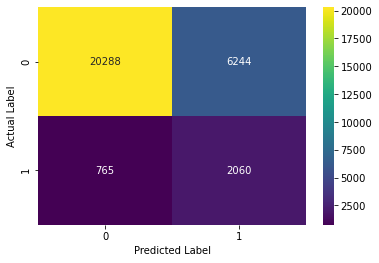

In [25]:
evaluation(y_test, gboost_over_preds)

### SMOTE

In [26]:
smo = SMOTE()

X_train_smote, y_train_smote = smo.fit_resample(X_train, y_train)

In [27]:
gboost_smote = GradientBoostingClassifier()

gboost_smote.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier()

In [28]:
gboost_smote.score(X_train_smote, y_train_smote), gboost_smote.score(X_test, y_test)

(0.8804698787612287, 0.8450454746738427)

In [29]:
gboost_smote_preds = gboost_smote.predict(X_test)

              precision    recall  f1-score   support

   No Injury       0.95      0.88      0.91     26532
      Injury       0.32      0.54      0.40      2825

    accuracy                           0.85     29357
   macro avg       0.63      0.71      0.66     29357
weighted avg       0.89      0.85      0.86     29357



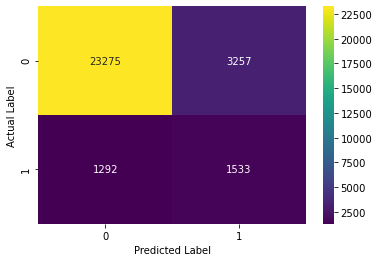

In [30]:
evaluation(y_test, gboost_smote_preds)